# Visualisations

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys

sys.path.append('../hydra_tod/')

from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time, TimeDelta
import astropy.units as u
from utils import Leg_poly_proj, view_samples
from flicker_model import sim_noise, flicker_cov
from simulation import * 

In [2]:
import pickle
with open('tod_simulation_single.pkl', 'rb') as f:
    tod_sim = pickle.load(f)
# Load the simulation data from a pickle file
with open('multi_tod_simulation_data.pkl', 'rb') as f:
    multi_tod_sim = pickle.load(f)

In [3]:
alpha = 2.0
logf0=-4.874571109426952
gain_params_setting = np.array([6.31194264, 0.42038942, 0.264222, 0.05578821])
gain_params_rising = np.array([6.84507868, 0.14156859, 0.7441104, 0.77863955])
rec_params = np.array([15.0, 12.6, 0.5, 0.5, 0.5])

In [4]:
true_others_1 = np.hstack((gain_params_setting, rec_params, [logf0, alpha]))
true_others_2 = np.hstack((gain_params_setting, gain_params_rising, rec_params, rec_params, [logf0, alpha], [logf0, alpha]))

In [5]:
# Read the saved samples

GS1_Tsys_samples = np.load('outputs/GS1/Tsys_samples.npy')
GS1_gain_samples = np.load('outputs/GS1/gain_samples.npy')
GS1_noise_samples = np.load('outputs/GS1/noise_samples.npy')
GS1_Tsky = GS1_Tsys_samples[:, :-5]
GS1_others = np.hstack((GS1_gain_samples[0],  GS1_Tsys_samples[:, -5:], GS1_noise_samples[0]))
GS1_all = np.hstack((GS1_Tsky, GS1_others))

GS5_Tsys_samples = np.load('outputs/GS5/Tsys_samples.npy')
GS5_gain_samples = np.load('outputs/GS5/gain_samples.npy')
GS5_noise_samples = np.load('outputs/GS5/noise_samples.npy')
GS5_Tsky = GS5_Tsys_samples[:, :-5]
GS5_others = np.hstack((GS5_gain_samples[0], GS5_Tsys_samples[:, -5:], GS5_noise_samples[0]))
GS5_all = np.hstack((GS5_Tsky, GS5_others))

GSF5_Tsys_samples = np.load('outputs/GSF5/Tsys_samples.npy')
GSF5_gain_samples = np.load('outputs/GSF5/gain_samples.npy')
GSF5_noise_samples = np.load('outputs/GSF5/noise_samples.npy')
GSF5_Tsky = GSF5_Tsys_samples[:, :-5]
GSF5_others = np.hstack((GSF5_gain_samples[0], GSF5_Tsys_samples[:, -5:], GSF5_noise_samples[0]))
GSF5_all = np.hstack((GSF5_Tsky, GSF5_others))

GS1_db_Tsys_samples = np.load('outputs/GS1_db/Tsys_samples.npy')
GS1_db_gain_samples = np.load('outputs/GS1_db/gain_samples.npy')
GS1_db_noise_samples = np.load('outputs/GS1_db/noise_samples.npy')
GS1_db_Tsky = GS1_db_Tsys_samples[:, :-10]
GS1_db_others = np.hstack((GS1_db_gain_samples[0], GS1_db_gain_samples[1], GS1_db_Tsys_samples[:, -10:], 
                           GS1_db_noise_samples[0], GS1_db_noise_samples[1]))
GS1_db_all = np.hstack((GS1_db_Tsky, GS1_db_others))

GS5_db_Tsys_samples = np.load('outputs/GS5_db/Tsys_samples.npy')
GS5_db_gain_samples = np.load('outputs/GS5_db/gain_samples.npy')
GS5_db_noise_samples = np.load('outputs/GS5_db/noise_samples.npy')
GS5_db_Tsky = GS5_db_Tsys_samples[:, :-10]
GS5_db_others = np.hstack((GS5_db_gain_samples[0], GS5_db_gain_samples[1], GS5_db_Tsys_samples[:, -10:], 
                           GS5_db_noise_samples[0], GS5_db_noise_samples[1]))
GS5_db_all = np.hstack((GS5_db_Tsky, GS5_db_others))

GSF5_db_Tsys_samples = np.load('outputs/GSF5_db/Tsys_samples.npy')
GSF5_db_gain_samples = np.load('outputs/GSF5_db/gain_samples.npy')
GSF5_db_noise_samples = np.load('outputs/GSF5_db/noise_samples.npy')
GSF5_db_Tsky = GSF5_db_Tsys_samples[:, :-10]
GSF5_db_others = np.hstack((GSF5_db_gain_samples[0], GSF5_db_gain_samples[1], GSF5_db_Tsys_samples[:, -10:], 
                           GSF5_db_noise_samples[0], GSF5_db_noise_samples[1]))
GSF5_db_all = np.hstack((GSF5_db_Tsky, GSF5_db_others))

# Parameter Correlation Visualizations

This section demonstrates two methods for visualizing parameter correlations:
1. **Correlation Matrix Plot**: Direct visualization of the correlation matrix as a heatmap
2. **Chord Plot**: Interactive visualization showing relationships between parameters

We'll use sample data from different analysis runs (GS1, GS5, GSF5, and their "_db" variants).

In [6]:
# Install required packages for correlation visualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

print("Required packages imported successfully!")

Required packages imported successfully!


In [7]:
def plot_correlation_matrix(samples, title="Parameter Correlation Matrix", param_names=None, figsize=(10, 8)):
    """
    Plot correlation matrix as a heatmap
    
    Parameters:
    -----------
    samples : array-like, shape (N_samples, N_params)
        2D array of parameter samples
    title : str
        Title for the plot
    param_names : list, optional
        Names of parameters. If None, uses generic names
    figsize : tuple
        Figure size
    """
    # Convert to numpy array if needed
    samples = np.array(samples)
    n_samples, n_params = samples.shape
    
    # Create parameter names if not provided
    if param_names is None:
        param_names = [f'Param_{i+1}' for i in range(n_params)]
    
    # Calculate correlation matrix
    corr_matrix = np.corrcoef(samples.T)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot heatmap
    im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)
    
    # Set ticks and labels
    ax.set_xticks(range(n_params))
    ax.set_yticks(range(n_params))
    # ax.set_xticklabels(param_names, rotation=45, ha='right')
    ax.set_yticklabels(param_names)
    
    # Add correlation values as text
    for i in range(n_params):
        for j in range(n_params):
            text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                          ha="center", va="center", 
                          color="white" if abs(corr_matrix[i, j]) > 0.5 else "black",
                          fontsize=8)
    
    ax.set_title(title, pad=20)
    plt.tight_layout()
    
    return fig, ax, corr_matrix

In [8]:
def plot_large_correlation_matrix(samples, title="Large Correlation Matrix", param_names=None, 
                                figsize=(12, 10), show_values=False, value_threshold=0.5, ftsize=12,
                                cluster_params=True, annot_fontsize=6):
    """
    Plot correlation matrix optimized for large parameter spaces
    
    Parameters:
    -----------
    samples : array-like, shape (N_samples, N_params)
        2D array of parameter samples
    title : str
        Title for the plot
    param_names : list, optional
        Names of parameters. If None, uses generic names
    figsize : tuple
        Figure size
    show_values : bool
        Whether to show correlation values as text (only for small matrices)
    value_threshold : float
        Only show values with |correlation| > threshold
    cluster_params : bool
        Whether to cluster parameters by similarity
    annot_fontsize : int
        Font size for annotations
    """
    samples = np.array(samples)
    n_samples, n_params = samples.shape
    
    # Create parameter names if not provided
    if param_names is None:
        param_names = [f'P{i+1}' for i in range(n_params)]
    
    # Calculate correlation matrix
    corr_matrix = np.corrcoef(samples.T)
    
    # Optional clustering to group similar parameters
    if cluster_params and n_params > 10:
        from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
        from scipy.spatial.distance import squareform
        
        # Use correlation distance for clustering
        distance_matrix = 1 - np.abs(corr_matrix)
        condensed_distances = squareform(distance_matrix, checks=False)
        linkage_matrix = linkage(condensed_distances, method='average')
        cluster_order = leaves_list(linkage_matrix)
        
        # Reorder correlation matrix and parameter names
        corr_matrix = corr_matrix[cluster_order][:, cluster_order]
        param_names = [param_names[i] for i in cluster_order]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot heatmap with better colormap for large matrices
    im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal', 
                   interpolation='nearest')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20, 
                   fontsize=ftsize)
    
    # Set ticks - reduce number for large matrices
    if n_params <= 20:
        tick_spacing = 1
        show_all_labels = True
    elif n_params <= 50:
        tick_spacing = 2
        show_all_labels = False
    else:
        tick_spacing = max(1, n_params // 10)
        show_all_labels = False
    
    tick_positions = range(0, n_params, tick_spacing)
    ax.set_xticks(tick_positions)
    ax.set_yticks(tick_positions)
    
    if show_all_labels:
        ax.set_xticklabels([param_names[i] for i in tick_positions], 
                          rotation=45, ha='right', fontsize=ftsize)
        ax.set_yticklabels([param_names[i] for i in tick_positions], fontsize=ftsize)
    else:
        # For large matrices, show only every nth label
        ax.set_xticklabels([param_names[i] if i % tick_spacing == 0 else '' 
                           for i in tick_positions], rotation=45, ha='right', fontsize=ftsize-3)
        ax.set_yticklabels([param_names[i] if i % tick_spacing == 0 else '' 
                           for i in tick_positions], fontsize=ftsize-3)
    
    # Only show correlation values for small matrices or strong correlations
    if show_values and n_params <= 15:
        # Show all values for small matrices
        for i in range(n_params):
            for j in range(n_params):
                if abs(corr_matrix[i, j]) > value_threshold or i == j:
                    color = "white" if abs(corr_matrix[i, j]) > 0.7 else "black"
                    ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                           ha="center", va="center", color=color, 
                           fontsize=annot_fontsize)
    elif show_values and n_params <= 30:
        # Show only strong correlations for medium matrices
        for i in range(n_params):
            for j in range(n_params):
                if abs(corr_matrix[i, j]) > value_threshold:
                    color = "white" if abs(corr_matrix[i, j]) > 0.7 else "black"
                    ax.text(j, i, f'{corr_matrix[i, j]:.1f}',
                           ha="center", va="center", color=color, 
                           fontsize=max(4, annot_fontsize-2))
    
    # Add grid for better readability in large matrices
    if n_params > 15:
        ax.set_xticks(np.arange(-0.5, n_params, tick_spacing), minor=True)
        ax.set_yticks(np.arange(-0.5, n_params, tick_spacing), minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.1, alpha=0.3)

    
    ax.set_title(title, pad=20, fontsize=ftsize)
    plt.tight_layout()
    
    # Print summary statistics
    upper_tri = np.triu(corr_matrix, k=1)
    non_zero_corr = upper_tri[upper_tri != 0]
    strong_corr = np.sum(np.abs(non_zero_corr) > 0.5)
    moderate_corr = np.sum((np.abs(non_zero_corr) > 0.3) & (np.abs(non_zero_corr) <= 0.5))
    
    print(f"Matrix size: {n_params}x{n_params}")
    print(f"Strong correlations (|r| > 0.5): {strong_corr}")
    print(f"Moderate correlations (0.3 < |r| ≤ 0.5): {moderate_corr}")
    print(f"Max absolute correlation: {np.max(np.abs(non_zero_corr)):.3f}")
    
    return fig, ax, corr_matrix

def plot_correlation_highlights(samples, title="Correlation Highlights", param_names=None, 
                              threshold=0.5, figsize=(10, 6)):
    """
    Plot only the strongest correlations in a clean format
    """
    samples = np.array(samples)
    n_samples, n_params = samples.shape
    
    if param_names is None:
        param_names = [f'P{i+1}' for i in range(n_params)]
    
    corr_matrix = np.corrcoef(samples.T)
    
    # Find strong correlations
    strong_pairs = []
    for i in range(n_params):
        for j in range(i+1, n_params):
            corr_val = corr_matrix[i, j]
            if abs(corr_val) >= threshold:
                strong_pairs.append((param_names[i], param_names[j], corr_val))
    
    if not strong_pairs:
        print(f"No correlations above threshold {threshold}")
        return None, None, None
    
    # Sort by absolute correlation strength
    strong_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Create bar plot of strongest correlations
    fig, ax = plt.subplots(figsize=figsize)
    
    pair_labels = [f"{pair[0]}-{pair[1]}" for pair in strong_pairs]
    corr_values = [pair[2] for pair in strong_pairs]
    
    colors = ['red' if val < 0 else 'blue' for val in corr_values]
    bars = ax.barh(range(len(pair_labels)), corr_values, color=colors, alpha=0.7)
    
    ax.set_yticks(range(len(pair_labels)))
    ax.set_yticklabels(pair_labels, fontsize=10)
    ax.set_xlabel('Correlation Coefficient')
    ax.set_title(f'{title}\n(|r| > {threshold})', fontsize=12)
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, corr_values)):
        ax.text(val + (0.02 if val > 0 else -0.02), i, f'{val:.3f}',
                va='center', ha='left' if val > 0 else 'right', fontsize=9)
    
    plt.tight_layout()
    
    return fig, ax, strong_pairs


In [9]:

def plot_full_correlation_analysis(samples, title="Full Correlation Analysis"):
    

    # Clean correlation matrix without text annotations
    fig1, ax1, corr_mat = plot_large_correlation_matrix(
        samples,
        title=title,
        show_values=False,  # Don't show values for large matrix
        cluster_params=False
    )
    plt.show()
    
    # # Highlight plot showing only strong correlations
    # fig2, ax2, strong_pairs = plot_correlation_highlights(
    #     GS1_db_Tsys_samples,
    #     title="GS1_db Tsys - Strong Correlations Only",
    #     threshold=0.3
    # )
    # if fig2 is not None:
    #     plt.show()
    #     print(f"\nFound {len(strong_pairs)} strong correlations:")
    #     for pair in strong_pairs[:10]:  # Show top 10
    #         print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
    


Matrix size: 386x386
Strong correlations (|r| > 0.5): 8814
Moderate correlations (0.3 < |r| ≤ 0.5): 6903
Max absolute correlation: 0.983


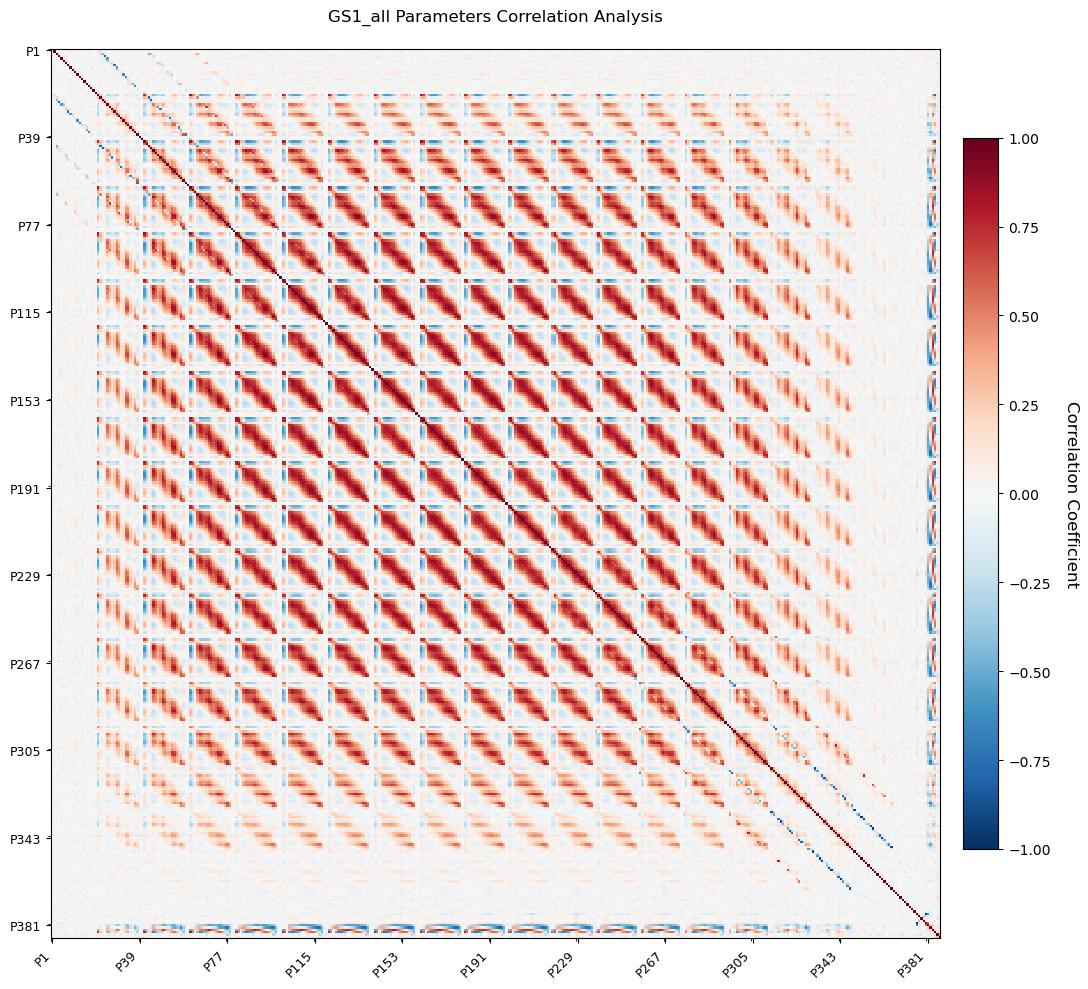

In [10]:
aux_titles = [
    "1×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude",
    "2×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude"
]

plot_full_correlation_analysis(GS1_all, title="GS1_all Parameters Correlation Analysis")

Matrix size: 495x495
Strong correlations (|r| > 0.5): 10909
Moderate correlations (0.3 < |r| ≤ 0.5): 16412
Max absolute correlation: 0.981


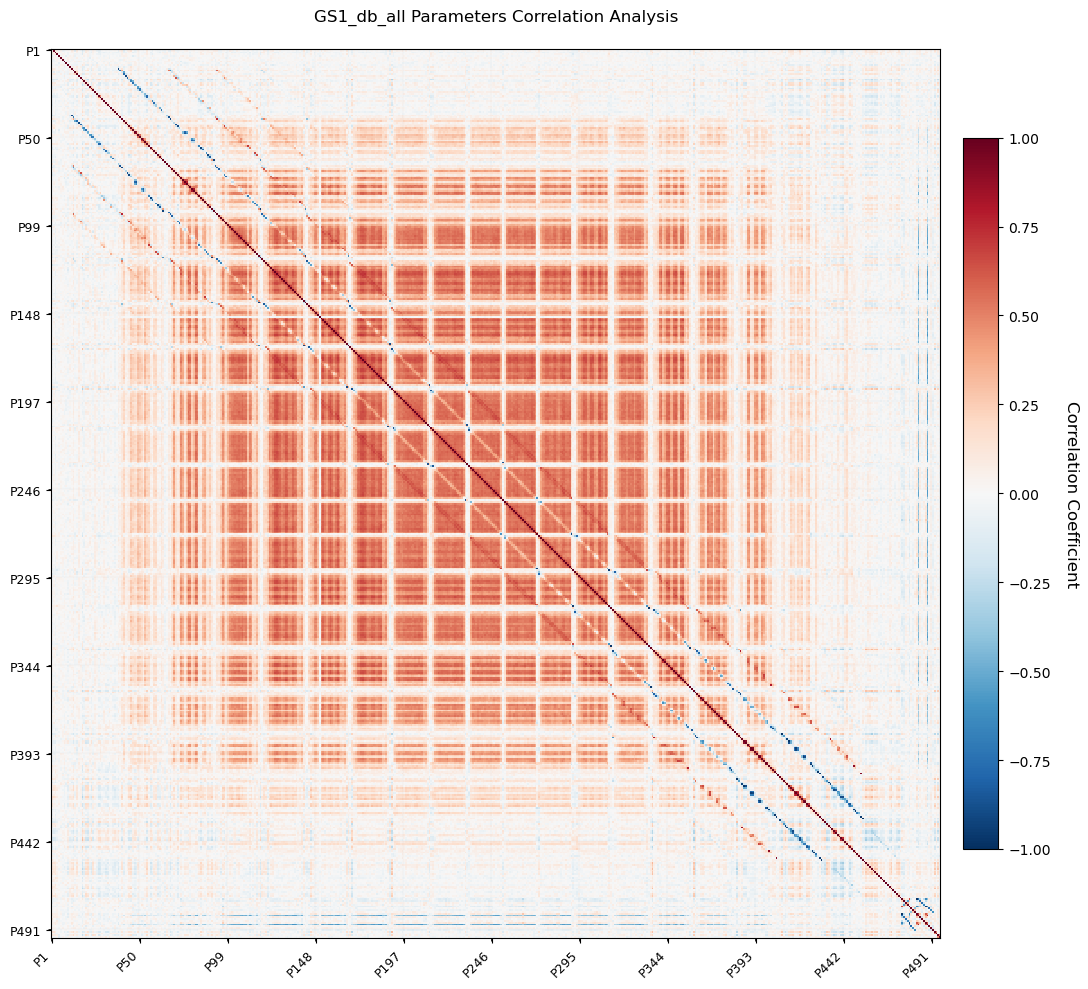

In [11]:
plot_full_correlation_analysis(GS1_db_all, title="GS1_db_all Parameters Correlation Analysis")

Matrix size: 386x386
Strong correlations (|r| > 0.5): 2459
Moderate correlations (0.3 < |r| ≤ 0.5): 3970
Max absolute correlation: 0.971


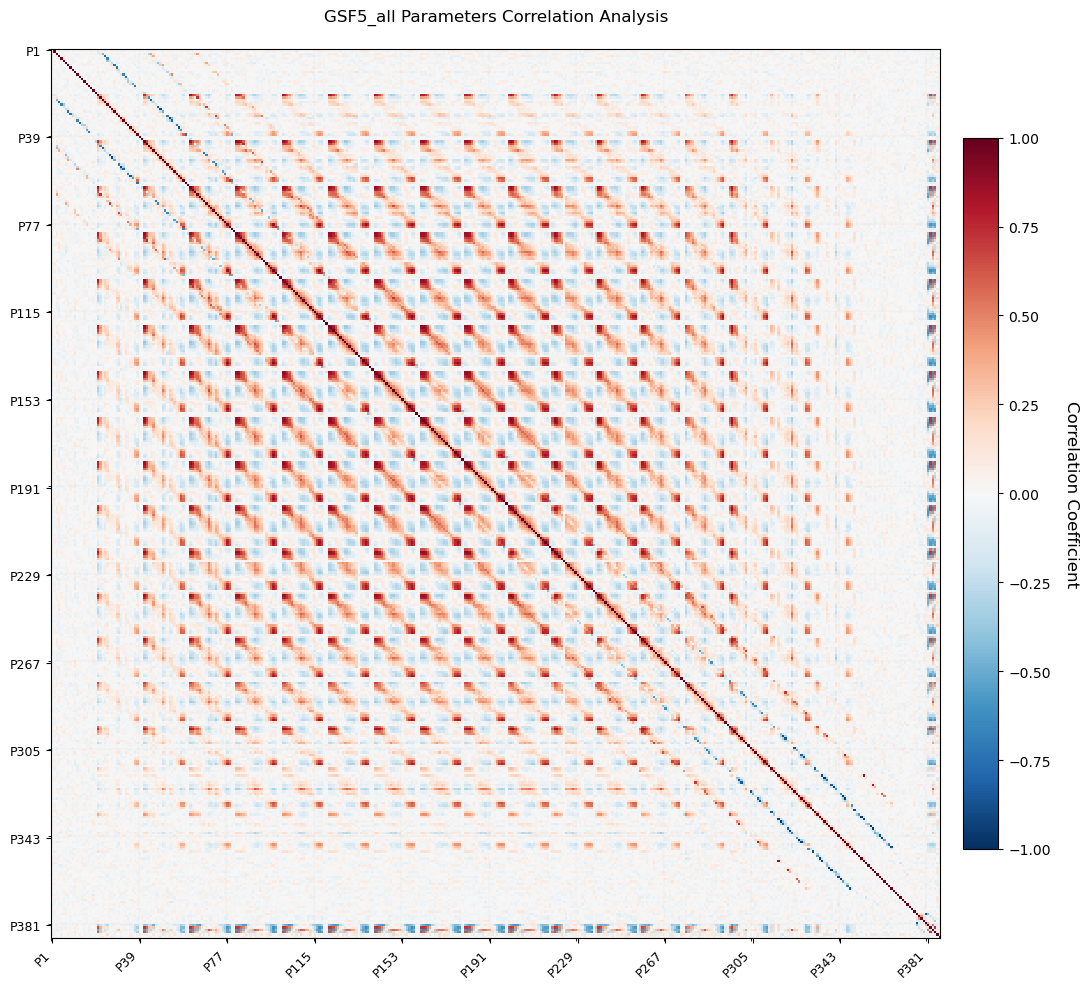

In [12]:
plot_full_correlation_analysis(GSF5_all, title="GSF5_all Parameters Correlation Analysis")

Matrix size: 495x495
Strong correlations (|r| > 0.5): 276
Moderate correlations (0.3 < |r| ≤ 0.5): 2302
Max absolute correlation: 0.985


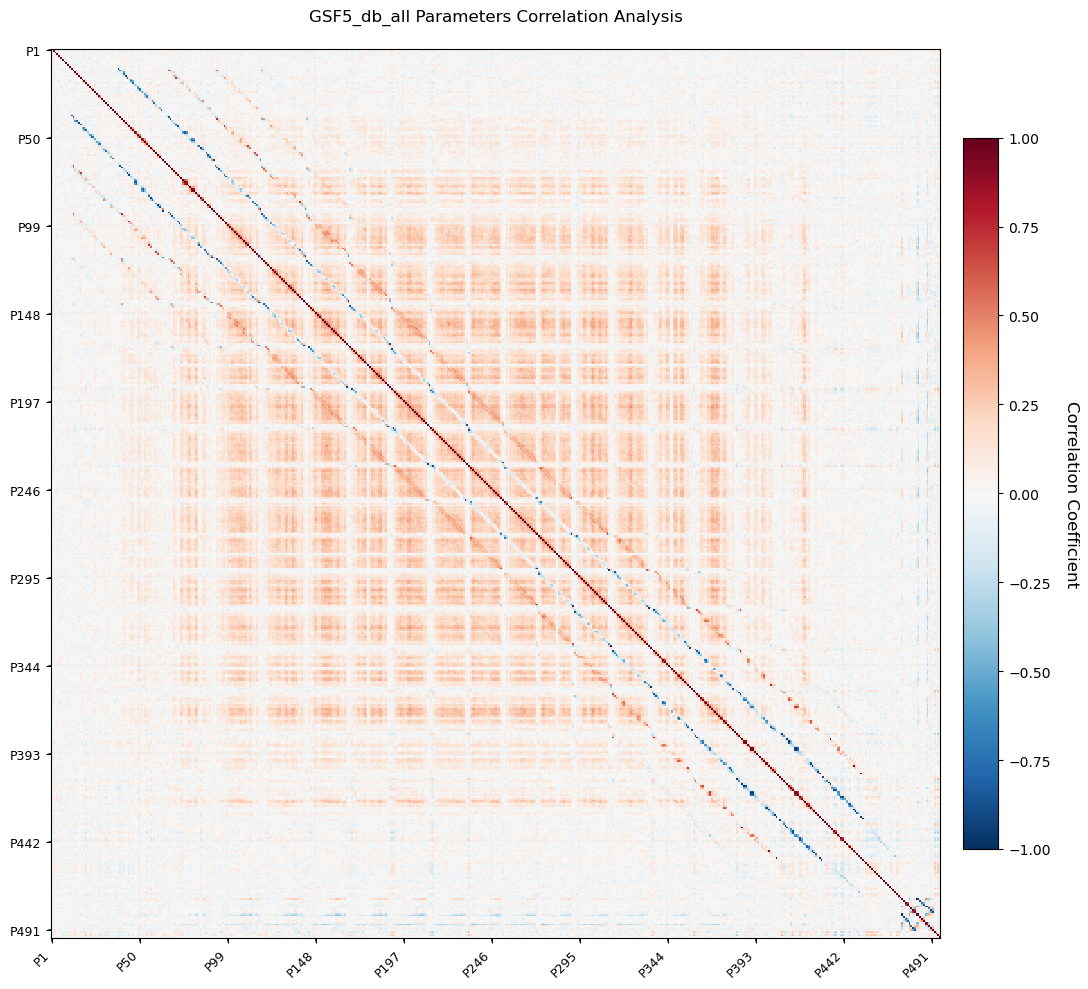

In [13]:
plot_full_correlation_analysis(GSF5_db_all, title="GSF5_db_all Parameters Correlation Analysis")

1×TOD, 1 CalSrc:
  Matrix size: 386×386 (375 sky, 11 others)
  Strong correlations (|r| > 0.5): 8814
  Moderate correlations (0.3 < |r| ≤ 0.5): 6903
  Max absolute correlation: 0.983

2×TOD, 1 CalSrc:
  Matrix size: 495×495 (473 sky, 22 others)
  Strong correlations (|r| > 0.5): 10909
  Moderate correlations (0.3 < |r| ≤ 0.5): 16412
  Max absolute correlation: 0.981

1×TOD, 5 CalSrc:
  Matrix size: 386×386 (375 sky, 11 others)
  Strong correlations (|r| > 0.5): 2380
  Moderate correlations (0.3 < |r| ≤ 0.5): 3485
  Max absolute correlation: 0.996

2×TOD, 5 CalSrc:
  Matrix size: 495×495 (473 sky, 22 others)
  Strong correlations (|r| > 0.5): 276
  Moderate correlations (0.3 < |r| ≤ 0.5): 2505
  Max absolute correlation: 0.984

1×TOD, 5 CalSrc + 1/f prior:
  Matrix size: 386×386 (375 sky, 11 others)
  Strong correlations (|r| > 0.5): 2459
  Moderate correlations (0.3 < |r| ≤ 0.5): 3970
  Max absolute correlation: 0.971

2×TOD, 5 CalSrc + 1/f prior:
  Matrix size: 495×495 (473 sky, 22 ot

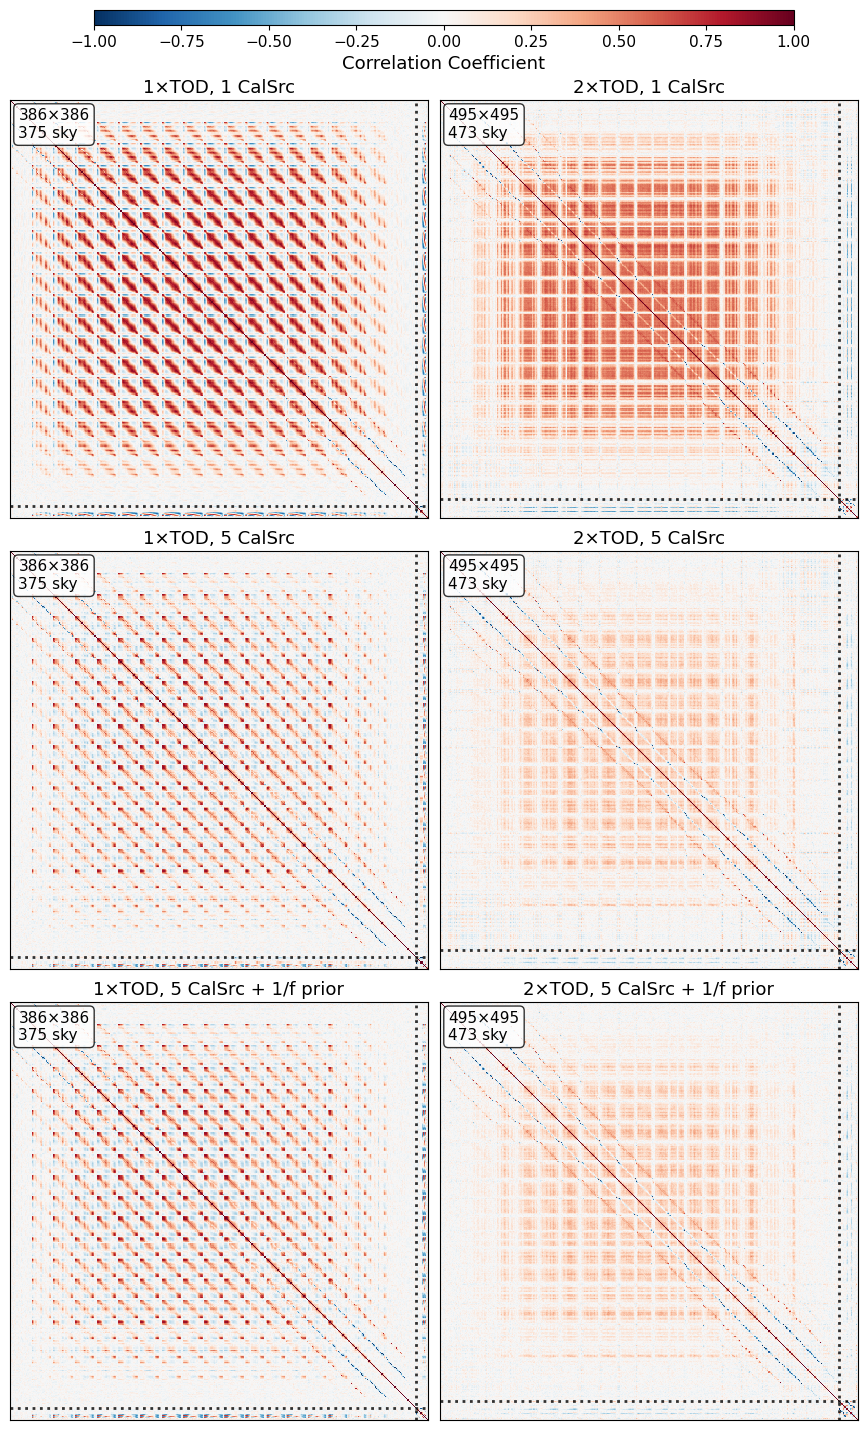

(<Figure size 1000x1500 with 7 Axes>,
 array([[<Axes: title={'center': '1×TOD, 1 CalSrc'}>,
         <Axes: title={'center': '2×TOD, 1 CalSrc'}>],
        [<Axes: title={'center': '1×TOD, 5 CalSrc'}>,
         <Axes: title={'center': '2×TOD, 5 CalSrc'}>],
        [<Axes: title={'center': '1×TOD, 5 CalSrc + 1/f prior'}>,
         <Axes: title={'center': '2×TOD, 5 CalSrc + 1/f prior'}>]],
       dtype=object),
 [array([[ 1.        ,  0.02288814, -0.02315725, ..., -0.02120818,
          -0.05186497,  0.08233215],
         [ 0.02288814,  1.        ,  0.01417481, ..., -0.05141676,
          -0.02381496,  0.03809541],
         [-0.02315725,  0.01417481,  1.        , ...,  0.00921409,
           0.04190399, -0.03849954],
         ...,
         [-0.02120818, -0.05141676,  0.00921409, ...,  1.        ,
           0.14505316, -0.11764212],
         [-0.05186497, -0.02381496,  0.04190399, ...,  0.14505316,
           1.        ,  0.29608985],
         [ 0.08233215,  0.03809541, -0.03849954, ..., 

In [14]:
def plot_six_correlation_matrices(samples_list, titles_list, main_title="Parameter Correlation Matrices", 
                                 figsize=(12, 8), cluster_params=False, ftsize=10, 
                                 show_values=False, value_threshold=0.5, sky_param_counts=None):
    """
    Plot 6 correlation matrices in a 2x3 subplot layout with a single colorbar
    
    Parameters:
    -----------
    samples_list : list of arrays
        List of 6 sample arrays, each of shape (N_samples, N_params)
    titles_list : list of strings
        List of 6 titles for each subplot
    main_title : str
        Overall title for the figure
    figsize : tuple
        Figure size
    cluster_params : bool
        Whether to cluster parameters by similarity
    ftsize : int
        Font size for labels and titles
    show_values : bool
        Whether to show correlation values as text (only for small matrices)
    value_threshold : float
        Only show values with |correlation| > threshold
    sky_param_counts : list of int, optional
        Number of sky parameters for each subplot. If None, uses [375, 375, 375, 473, 473, 473]
    """
    
    if len(samples_list) != 6 or len(titles_list) != 6:
        raise ValueError("Must provide exactly 6 sample arrays and 6 titles")
    
    # Default sky parameter counts if not provided
    if sky_param_counts is None:
        sky_param_counts = [375, 375, 375, 473, 473, 473]
    
    # Calculate all correlation matrices first to get global vmin/vmax
    corr_matrices = []
    all_corr_values = []
    
    for samples in samples_list:
        samples = np.array(samples)
        n_samples, n_params = samples.shape
        
        # Calculate correlation matrix
        corr_matrix = np.corrcoef(samples.T)
        
        # Optional clustering
        if cluster_params and n_params > 10:
            try:
                from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
                from scipy.spatial.distance import squareform
                
                # Use correlation distance for clustering
                distance_matrix = 1 - np.abs(corr_matrix)
                condensed_distances = squareform(distance_matrix, checks=False)
                linkage_matrix = linkage(condensed_distances, method='average')
                cluster_order = leaves_list(linkage_matrix)
                
                # Reorder correlation matrix
                corr_matrix = corr_matrix[cluster_order][:, cluster_order]
            except ImportError:
                print("scipy not available for clustering, using original order")
        
        corr_matrices.append(corr_matrix)
        
        # Collect all correlation values for global color scale
        upper_tri = np.triu(corr_matrix, k=1)
        all_corr_values.extend(upper_tri[upper_tri != 0])
    
    # Create figure and subplots
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    if main_title is not None:
        fig.suptitle(main_title, fontsize=ftsize+4, y=0.98)
    
    # Flatten axes for easier indexing
    axes_flat = axes.flatten()
    
    # Plot each correlation matrix
    images = []
    for idx, (corr_matrix, title, ax) in enumerate(zip(corr_matrices, titles_list, axes_flat)):
        n_params = corr_matrix.shape[0]
        n_sky_params = sky_param_counts[idx]
        
        # Plot heatmap
        im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal', 
                      interpolation='nearest')
        images.append(im)
        
        # Add dashed lines to separate sky parameters from others
        if n_sky_params < n_params:
            # Vertical line separating sky (left) from others (right)
            ax.axvline(x=n_sky_params-0.5, color='black', linestyle=':', linewidth=2, alpha=0.8)
            # Horizontal line separating sky (top) from others (bottom)  
            ax.axhline(y=n_sky_params-0.5, color='black', linestyle=':', linewidth=2, alpha=0.8)
        
        # Set ticks - reduce number for large matrices
        if n_params <= 20:
            tick_spacing = 1
            show_all_labels = True
        elif n_params <= 50:
            tick_spacing = 2
            show_all_labels = False
        else:
            tick_spacing = max(1, n_params // 10)
            show_all_labels = False
        
        tick_positions = range(0, n_params, tick_spacing)
        ax.set_xticks(tick_positions)
        ax.set_yticks(tick_positions)
        
        # For subplots, use minimal labeling to avoid clutter
        if n_params <= 30 and show_all_labels:
            # Show some labels for smaller matrices
            ax.set_xticklabels([f'P{i+1}' if i % (tick_spacing*2) == 0 else '' 
                               for i in tick_positions], rotation=45, ha='right', fontsize=ftsize-2)
            ax.set_yticklabels([f'P{i+1}' if i % (tick_spacing*2) == 0 else '' 
                               for i in tick_positions], fontsize=ftsize-2)
        else:
            # For large matrices, minimal tick labels
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            
            # Add parameter count and sky parameter info as text
            info_text = f'{n_params}×{n_params}\n{n_sky_params} sky'
            ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
                   fontsize=ftsize-1, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add correlation values for very small matrices only
        if show_values and n_params <= 10:
            for i in range(n_params):
                for j in range(n_params):
                    if abs(corr_matrix[i, j]) > value_threshold or i == j:
                        color = "white" if abs(corr_matrix[i, j]) > 0.7 else "black"
                        ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                               ha="center", va="center", color=color, 
                               fontsize=max(6, ftsize-3))
        
        # Add grid for better readability in large matrices
        if n_params > 15:
            # ax.set_xticks(np.arange(-0.5, n_params, tick_spacing*2), minor=True)
            # ax.set_yticks(np.arange(-0.5, n_params, tick_spacing*2), minor=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.1, alpha=0.3)
        
        # Set subplot title
        ax.set_title(title, fontsize=ftsize+1, pad=5)
        
        # Print summary statistics for each matrix
        upper_tri = np.triu(corr_matrix, k=1)
        non_zero_corr = upper_tri[upper_tri != 0]
        strong_corr = np.sum(np.abs(non_zero_corr) > 0.5)
        moderate_corr = np.sum((np.abs(non_zero_corr) > 0.3) & (np.abs(non_zero_corr) <= 0.5))
        
        print(f"{title}:")
        print(f"  Matrix size: {n_params}×{n_params} ({n_sky_params} sky, {n_params-n_sky_params} others)")
        print(f"  Strong correlations (|r| > 0.5): {strong_corr}")
        print(f"  Moderate correlations (0.3 < |r| ≤ 0.5): {moderate_corr}")
        print(f"  Max absolute correlation: {np.max(np.abs(non_zero_corr)):.3f}")
        print()
    
    # Add a single colorbar for all subplots
    # Create colorbar axis at the top
    cbar_ax = fig.add_axes([0.13, 0.97, 0.7, 0.01])  # [left, bottom, width, height]
    cbar = fig.colorbar(images[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Correlation Coefficient', fontsize=ftsize+1)
    cbar.ax.tick_params(labelsize=ftsize-1)
    
    # Adjust subplot layout
    plt.subplots_adjust(left=0.04, right=0.9, top=0.92, bottom=0.04, 
                       wspace=0.0, hspace=0.08)
    
    # plt.tight_layout()
    plt.savefig('figures/six_correlation_matrices.pdf', dpi=300)
    
    return fig, axes, corr_matrices

# Function to create the 6-panel plot with your specific datasets
def plot_all_correlation_matrices():
    """
    Plot all 6 correlation matrices for the different analysis runs
    """
    
    # Check which datasets are available
    datasets = []
    titles = []
    dataset_names = ['GS1_all', 'GS1_db_all', 'GS5_all', 'GS5_db_all', 'GSF5_all', 'GSF5_db_all']
    
    aux_titles = [
        "1×TOD, 1 CalSrc",
        "2×TOD, 1 CalSrc",
        "1×TOD, 5 CalSrc", 
        "2×TOD, 5 CalSrc",
        "1×TOD, 5 CalSrc + 1/f prior",
        "2×TOD, 5 CalSrc + 1/f prior"
    ]
    
    for i, dataset_name in enumerate(dataset_names):
        if dataset_name in globals():
            datasets.append(globals()[dataset_name])
            titles.append(aux_titles[i])
        else:
            print(f"Warning: {dataset_name} not found in globals()")
    
    if len(datasets) == 6:
        # Sky parameter counts: first 3 panels have 375 sky params, last 3 have 473
        sky_counts = [375, 473] * 3
        
        fig, axes, corr_matrices = plot_six_correlation_matrices(
            datasets, 
            titles,
            main_title=None,
            figsize=(10, 15),
            cluster_params=False,
            ftsize=12,
            show_values=False,
            sky_param_counts=sky_counts
        )
        plt.show()
        return fig, axes, corr_matrices
    else:
        print(f"Only found {len(datasets)} datasets, need exactly 6")
        return None, None, None

# Execute the plotting function
plot_all_correlation_matrices()

1×TOD, 1 CalSrc - Sky-Others Cross-Correlations:
  Block size: 375×11
  Strong cross-correlations (|r| > 0.5): 285
  Moderate cross-correlations (0.3 < |r| ≤ 0.5): 382
  Max absolute cross-correlation: 0.804
  Mean absolute cross-correlation: 0.127

2×TOD, 1 CalSrc - Sky-Others Cross-Correlations:
  Block size: 473×22
  Strong cross-correlations (|r| > 0.5): 114
  Moderate cross-correlations (0.3 < |r| ≤ 0.5): 326
  Max absolute cross-correlation: 0.623
  Mean absolute cross-correlation: 0.063

1×TOD, 5 CalSrc - Sky-Others Cross-Correlations:
  Block size: 375×11
  Strong cross-correlations (|r| > 0.5): 178
  Moderate cross-correlations (0.3 < |r| ≤ 0.5): 196
  Max absolute cross-correlation: 0.734
  Mean absolute cross-correlation: 0.105

2×TOD, 5 CalSrc - Sky-Others Cross-Correlations:
  Block size: 473×22
  Strong cross-correlations (|r| > 0.5): 0
  Moderate cross-correlations (0.3 < |r| ≤ 0.5): 77
  Max absolute cross-correlation: 0.457
  Mean absolute cross-correlation: 0.047

1×T

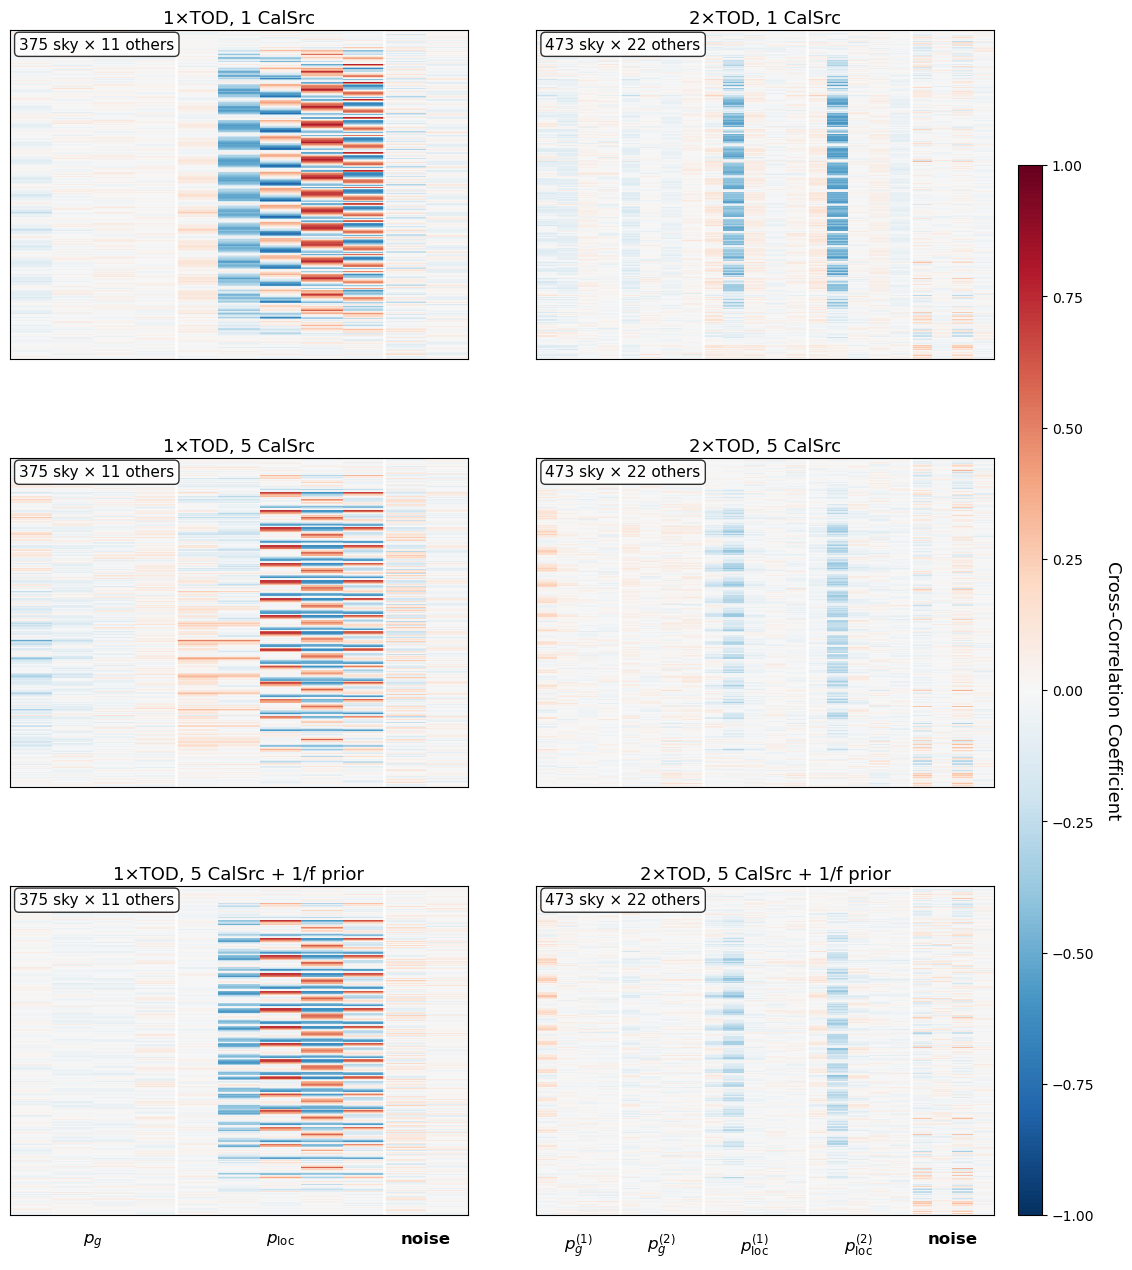

(<Figure size 1200x1500 with 7 Axes>,
 array([[<Axes: title={'center': '1×TOD, 1 CalSrc'}>,
         <Axes: title={'center': '2×TOD, 1 CalSrc'}>],
        [<Axes: title={'center': '1×TOD, 5 CalSrc'}>,
         <Axes: title={'center': '2×TOD, 5 CalSrc'}>],
        [<Axes: title={'center': '1×TOD, 5 CalSrc + 1/f prior'}>,
         <Axes: title={'center': '2×TOD, 5 CalSrc + 1/f prior'}>]],
       dtype=object),
 [array([[-0.00332489, -0.02525897, -0.01141548, ..., -0.02120818,
          -0.05186497,  0.08233215],
         [ 0.00747905,  0.03074653,  0.04684789, ..., -0.05141676,
          -0.02381496,  0.03809541],
         [-0.06106422, -0.04822177,  0.07157406, ...,  0.00921409,
           0.04190399, -0.03849954],
         ...,
         [ 0.05614884,  0.00816143, -0.01020017, ..., -0.04110687,
          -0.0777803 ,  0.00737517],
         [ 0.00279657, -0.02691196, -0.03451918, ..., -0.03862172,
          -0.03624864,  0.04994808],
         [ 0.02349459, -0.0018427 , -0.01824725, ..., 

In [22]:
def plot_sky_others_cross_correlations_3x2(samples_list, titles_list, main_title="Sky-Others Cross-Correlations", 
                                          figsize=(12, 16), ftsize=10, sky_param_counts=None,
                                          other_param_labels=None):
    """
    Plot only the sky-others cross-correlation blocks from correlation matrices in a 3x2 subplot layout
    
    Parameters:
    -----------
    samples_list : list of arrays
        List of 6 sample arrays, each of shape (N_samples, N_params)
    titles_list : list of strings
        List of 6 titles for each subplot
    main_title : str
        Overall title for the figure
    figsize : tuple
        Figure size
    ftsize : int
        Font size for labels and titles
    sky_param_counts : list of int, optional
        Number of sky parameters for each subplot. If None, uses [375, 375, 375, 473, 473, 473]
    other_param_labels : list of strings, optional
        Labels for the "other" parameters (x-axis labels)
    """
    
    if len(samples_list) != 6 or len(titles_list) != 6:
        raise ValueError("Must provide exactly 6 sample arrays and 6 titles")
    
    # Default sky parameter counts if not provided
    if sky_param_counts is None:
        sky_param_counts = [375, 375, 375, 473, 473, 473]
    
    # Calculate cross-correlation blocks
    cross_corr_blocks = []
    all_cross_corr_values = []
    
    for samples, n_sky_params in zip(samples_list, sky_param_counts):
        samples = np.array(samples)
        n_samples, n_params = samples.shape
        n_other_params = n_params - n_sky_params
        
        # Calculate full correlation matrix
        corr_matrix = np.corrcoef(samples.T)
        
        # Extract sky-others cross-correlation block (sky rows, others columns)
        # Sky parameters are first n_sky_params, others are the rest
        cross_corr_block = corr_matrix[:n_sky_params, n_sky_params:]
        cross_corr_blocks.append(cross_corr_block)
        
        # Collect values for global color scale
        all_cross_corr_values.extend(cross_corr_block.flatten())
    
    # Create figure and subplots - 3 rows, 2 columns
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    if main_title is not None:
        fig.suptitle(main_title, fontsize=ftsize+4, y=0.98)
    
    # Flatten axes for easier indexing
    axes_flat = axes.flatten()
    
    # Define parameter group structures for first and second columns
    def get_param_groups_and_labels(column_idx, n_other_params):
        """Get parameter groups and labels based on column index"""
        if column_idx % 2 == 0:  # First column (11 parameters)
            if n_other_params == 11:
                groups = [
                    ('$p_g$', 4, 0),           # p_g: indices 0-3
                    ('$p_{\\rm loc}$', 5, 4),  # p_loc: indices 4-8
                    ('noise', 2, 9)            # log f₀, α: indices 9-10
                ]
                labels = [f'$p_g^{{({i+1})}}$' for i in range(4)] + \
                        [f'$p_{{\\rm loc}}^{{({i+1})}}$' for i in range(5)] + \
                        ['$\\log f_0$', '$\\alpha$']
            else:
                # Fallback for unexpected sizes
                groups = [('Others', n_other_params, 0)]
                labels = [f'O{i+1}' for i in range(n_other_params)]
        else:  # Second column (22 parameters)
            if n_other_params == 22:
                groups = [
                    ('$p_g^{(1)}$', 4, 0),      # p_g^(1): indices 0-3
                    ('$p_g^{(2)}$', 4, 4),      # p_g^(2): indices 4-7
                    ('$p_{\\rm loc}^{(1)}$', 5, 8),   # p_loc^(1): indices 8-12
                    ('$p_{\\rm loc}^{(2)}$', 5, 13),  # p_loc^(2): indices 13-17
                    ('noise', 4, 18)            # log f₀^(1), α^(1), log f₀^(2), α^(2): indices 18-21
                ]
                labels = [f'$p_g^{{(1,{i+1})}}$' for i in range(4)] + \
                        [f'$p_g^{{(2,{i+1})}}$' for i in range(4)] + \
                        [f'$p_{{\\rm loc}}^{{(1,{i+1})}}$' for i in range(5)] + \
                        [f'$p_{{\\rm loc}}^{{(2,{i+1})}}$' for i in range(5)] + \
                        ['$\\log f_0^{(1)}$', '$\\alpha^{(1)}$', '$\\log f_0^{(2)}$', '$\\alpha^{(2)}$']
            else:
                # Fallback for unexpected sizes
                groups = [('Others', n_other_params, 0)]
                labels = [f'O{i+1}' for i in range(n_other_params)]
        
        return groups, labels
    
    # Plot each cross-correlation block
    images = []
    for idx, (cross_corr_block, title, ax) in enumerate(zip(cross_corr_blocks, titles_list, axes_flat)):
        n_sky_params = sky_param_counts[idx]
        n_other_params = cross_corr_block.shape[1]
        
        # Plot heatmap
        im = ax.imshow(cross_corr_block, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto', 
                      interpolation='nearest')
        images.append(im)
        
        # Remove y-ticks (sky parameters) for cleaner look
        ax.set_yticks([])
        
        # Get parameter groups and labels for this subplot
        param_groups, param_labels = get_param_groups_and_labels(idx, n_other_params)
        
        # Set x-ticks at parameter boundaries and group centers
        # ax.set_xticks(range(n_other_params))
        ax.set_xticks([])
        
        # Only show x-labels and group indicators on bottom row (indices 4 and 5)
        if idx >= 4:  # Bottom row
            # Show individual parameter labels (smaller font)
            # ax.set_xticklabels(param_labels, rotation=45, ha='right', fontsize=ftsize-3)
            ax.set_xticklabels([])
            
            # Add group separators and labels
            for group_name, group_size, start_idx in param_groups:
                end_idx = start_idx + group_size - 1
                
                # Add vertical lines to separate groups (except at the beginning and end)
                if start_idx > 0:
                    ax.axvline(x=start_idx-0.5, color='white', linestyle='-', linewidth=2, alpha=0.8)
                
                # Add group label at the center of each group
                center_x = start_idx + (group_size - 1) / 2
                ax.text(center_x, -0.05 , group_name, 
                       ha='center', va='top', fontsize=ftsize, fontweight='bold',
                       transform=ax.get_xaxis_transform())
        else:
            ax.set_xticklabels([])
            
            # Still add group separators for visual consistency
            param_groups_vis, _ = get_param_groups_and_labels(idx, n_other_params)
            for group_name, group_size, start_idx in param_groups_vis:
                if start_idx > 0:
                    ax.axvline(x=start_idx-0.5, color='white', linestyle='-', linewidth=2, alpha=0.8)
        
        # Add parameter count info as text
        info_text = f'{n_sky_params} sky × {n_other_params} others'
        ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
               fontsize=ftsize-1, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Set subplot title
        ax.set_title(title, fontsize=ftsize+1, pad=5)
        
        # Print summary statistics for each cross-correlation block
        flat_cross_corr = cross_corr_block.flatten()
        strong_cross_corr = np.sum(np.abs(flat_cross_corr) > 0.5)
        moderate_cross_corr = np.sum((np.abs(flat_cross_corr) > 0.3) & (np.abs(flat_cross_corr) <= 0.5))
        
        print(f"{title} - Sky-Others Cross-Correlations:")
        print(f"  Block size: {n_sky_params}×{n_other_params}")
        print(f"  Strong cross-correlations (|r| > 0.5): {strong_cross_corr}")
        print(f"  Moderate cross-correlations (0.3 < |r| ≤ 0.5): {moderate_cross_corr}")
        print(f"  Max absolute cross-correlation: {np.max(np.abs(flat_cross_corr)):.3f}")
        print(f"  Mean absolute cross-correlation: {np.mean(np.abs(flat_cross_corr)):.3f}")
        print()
    
    # Add a single colorbar for all subplots
    # Create colorbar axis on the right
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(images[0], cax=cbar_ax, orientation='vertical')
    cbar.set_label('Cross-Correlation Coefficient', rotation=270, labelpad=20, fontsize=ftsize+1)
    # cbar.ax.tick_params(labelsize=ftsize-1)
    
    # Adjust subplot layout to accommodate x-labels on bottom row
    plt.subplots_adjust(left=0.08, right=0.9, top=0.94, bottom=0.15, 
                       wspace=0.15, hspace=0.3)
    
    # Save figure
    plt.savefig('figures/sky_others_cross_correlations_3x2.pdf', dpi=300, bbox_inches='tight')
    
    return fig, axes, cross_corr_blocks

# Function to create the cross-correlation plot with your specific datasets
def plot_all_sky_others_cross_correlations_3x2():
    """
    Plot all 6 sky-others cross-correlation blocks for the different analysis runs in 3x2 layout
    """
    
    # Check which datasets are available
    datasets = []
    titles = []
    dataset_names = ['GS1_all', 'GS1_db_all', 'GS5_all', 'GS5_db_all', 'GSF5_all', 'GSF5_db_all']
    
    aux_titles = [
        "1×TOD, 1 CalSrc",
        "2×TOD, 1 CalSrc", 
        "1×TOD, 5 CalSrc",
        "2×TOD, 5 CalSrc",
        "1×TOD, 5 CalSrc + 1/f prior",
        "2×TOD, 5 CalSrc + 1/f prior"
    ]
    
    for i, dataset_name in enumerate(dataset_names):
        if dataset_name in globals():
            datasets.append(globals()[dataset_name])
            titles.append(aux_titles[i])
        else:
            print(f"Warning: {dataset_name} not found in globals()")
    
    if len(datasets) == 6:
        # Sky parameter counts: first 3 panels have 375 sky params, last 3 have 473
        sky_counts = [375, 473, 375, 473, 375, 473]
        
        fig, axes, cross_corr_blocks = plot_sky_others_cross_correlations_3x2(
            datasets, 
            titles,
            main_title=None,
            figsize=(12, 15),
            ftsize=12,
            sky_param_counts=sky_counts
        )
        plt.show()
        return fig, axes, cross_corr_blocks
    else:
        print(f"Only found {len(datasets)} datasets, need exactly 6")
        return None, None, None

# Execute the plotting function
plot_all_sky_others_cross_correlations_3x2()

=== SKY PARAMETER CORRELATION ANALYSIS ===
Analyzing GS1_db_Tsky (shape: (1000, 473))
Sky Parameter Correlation Analysis:
Total sky parameters: 473
Positive correlations (>0.1): 51006
Negative correlations (<-0.1): 2048
Strong positive correlations (>0.5): 10627
Max correlation: 0.941
Mean absolute correlation: 0.175


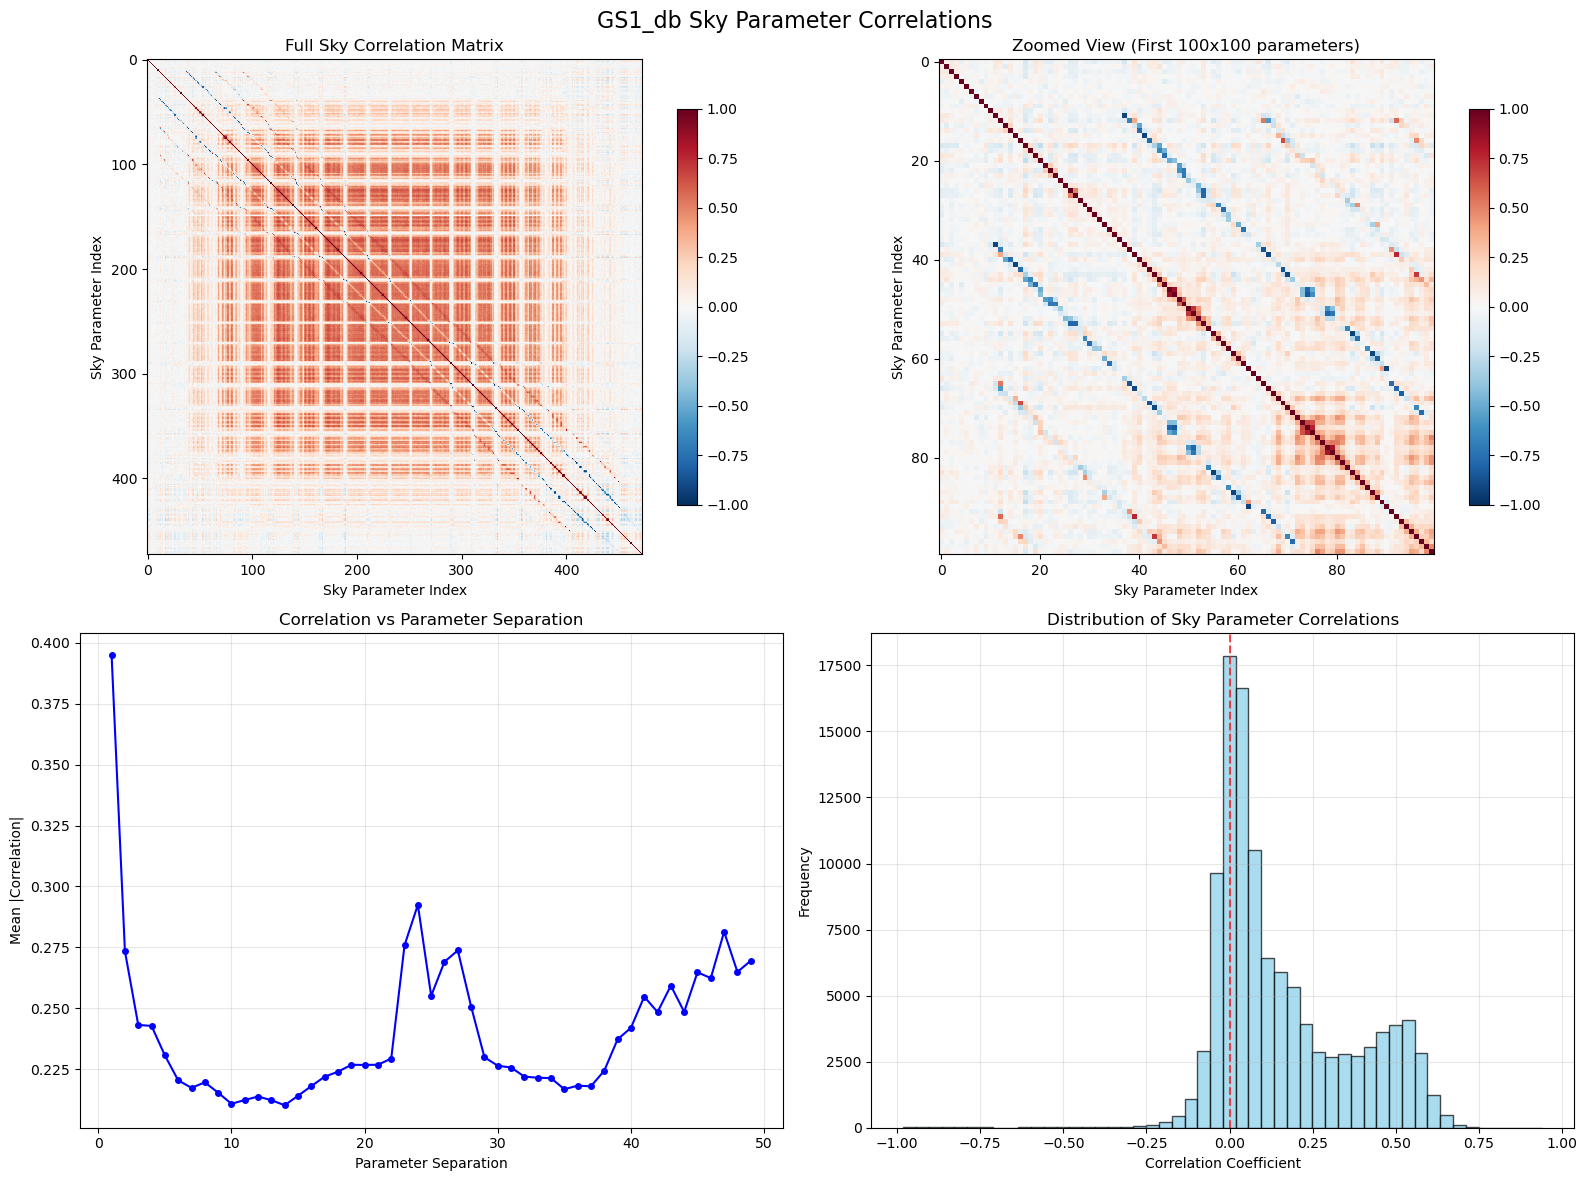


Identified correlation blocks (>0.3 correlation):
  Block: parameters 72-84 (size: 13)
  Block: parameters 100-472 (size: 373)

Analyzing GS5_db_Tsky
Sky Parameter Correlation Analysis:
Total sky parameters: 473
Positive correlations (>0.1): 30735
Negative correlations (<-0.1): 2667
Strong positive correlations (>0.5): 92
Max correlation: 0.935
Mean absolute correlation: 0.085


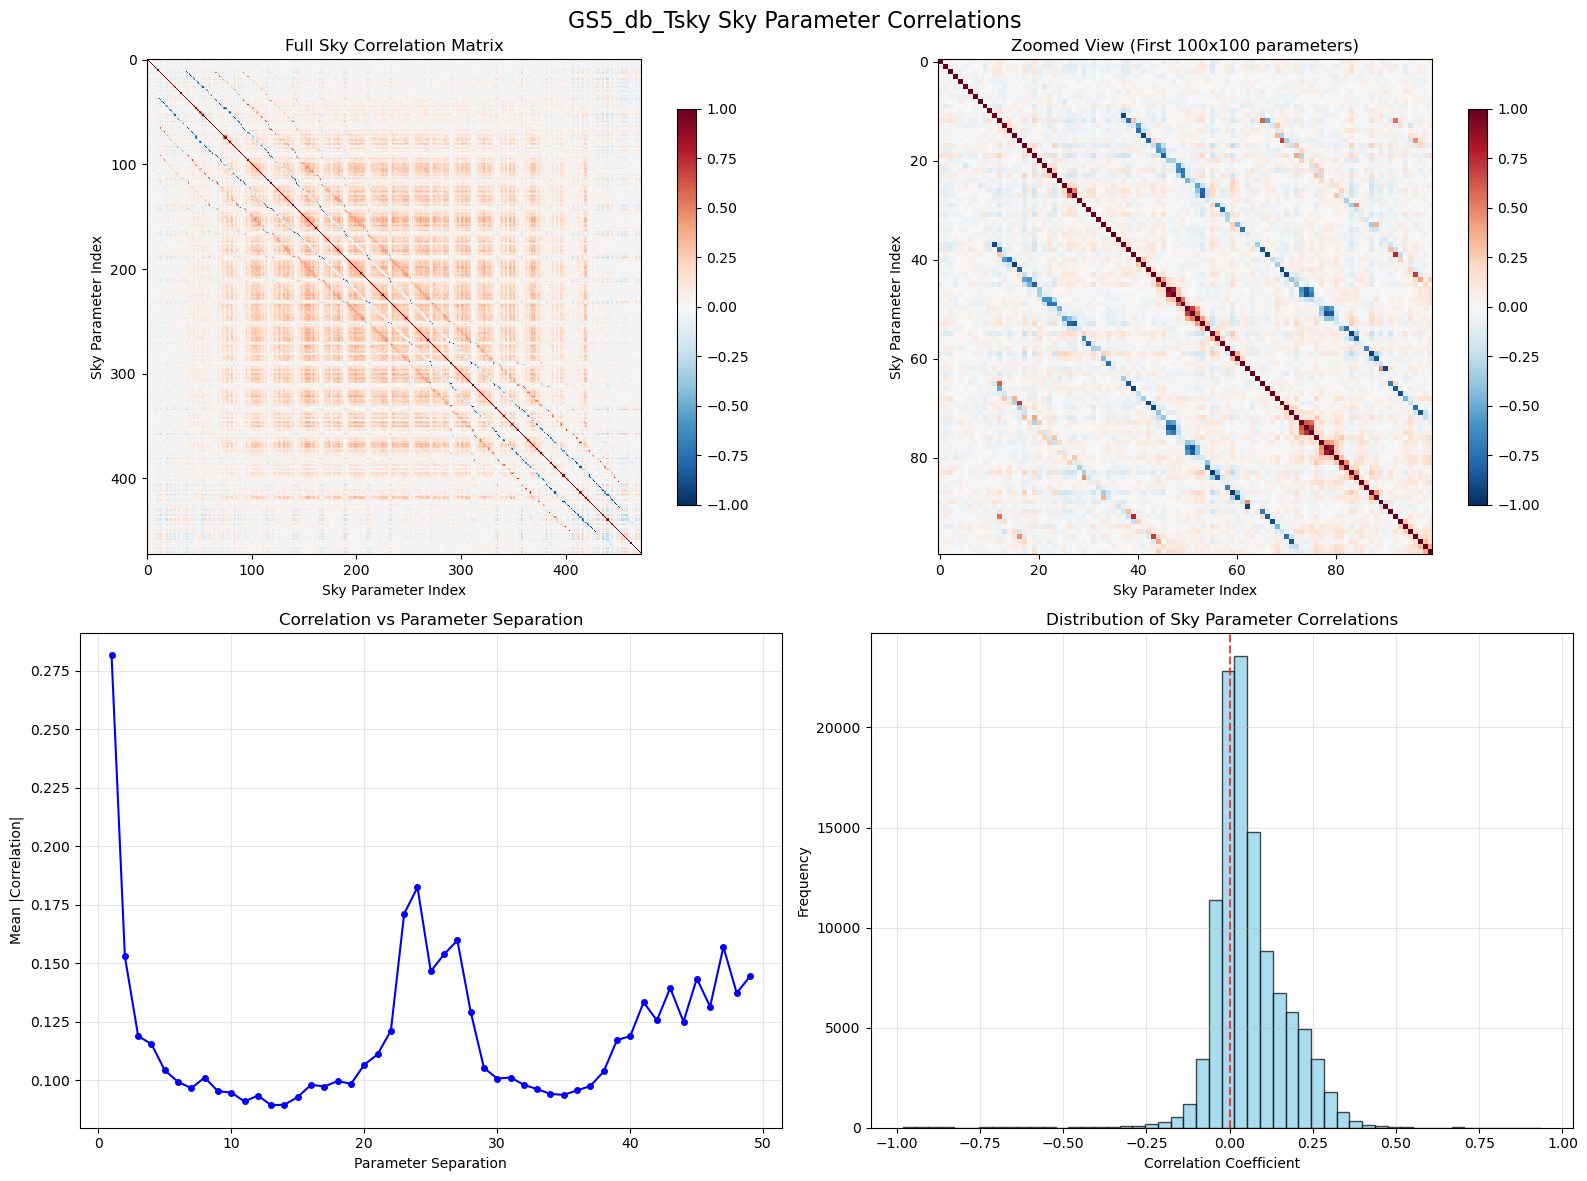


Analyzing GSF5_db_Tsky
Sky Parameter Correlation Analysis:
Total sky parameters: 473
Positive correlations (>0.1): 28619
Negative correlations (<-0.1): 1198
Strong positive correlations (>0.5): 92
Max correlation: 0.941
Mean absolute correlation: 0.079


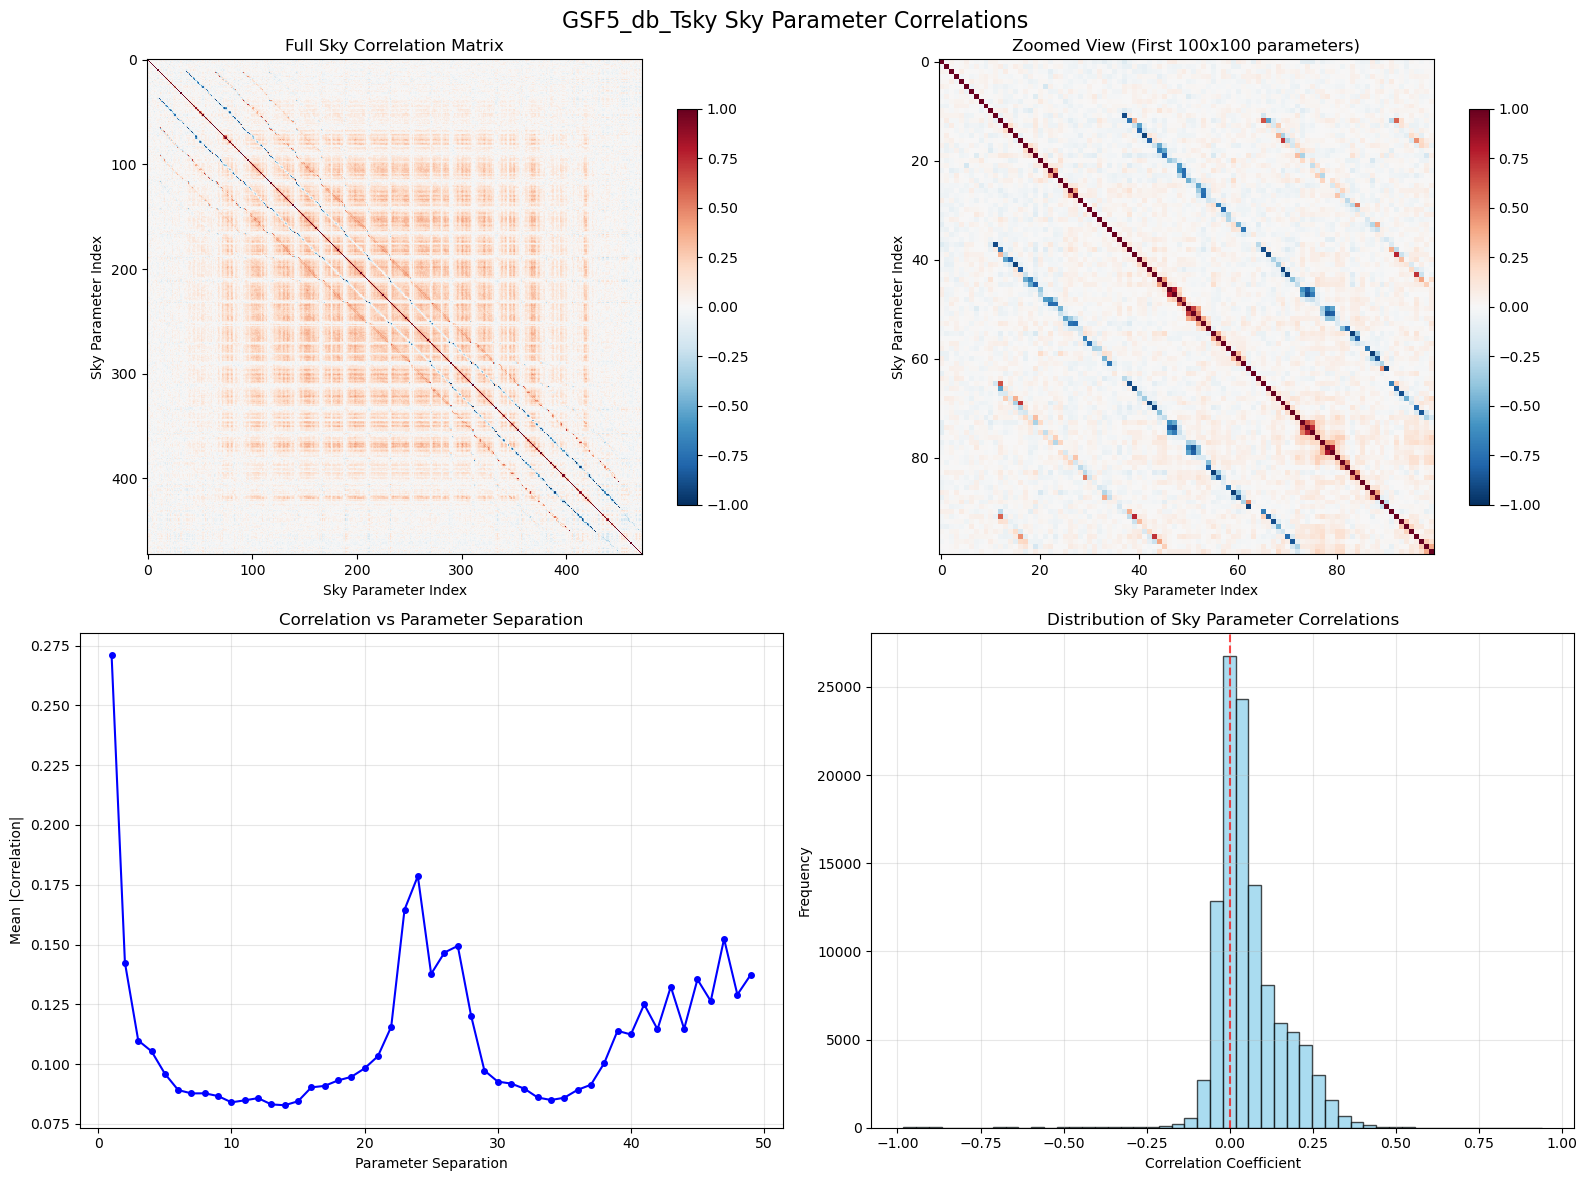

In [17]:
def analyze_sky_correlation_structure(sky_samples, title="Sky Correlation Structure Analysis"):
    """
    Analyze the spatial correlation structure in sky parameters
    """
    samples = np.array(sky_samples)
    n_samples, n_sky_params = samples.shape
    
    # Calculate correlation matrix
    corr_matrix = np.corrcoef(samples.T)
    
    # Create subplots for different analyses
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(title, fontsize=16)
    
    # 1. Full correlation matrix
    im1 = axes[0, 0].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, 
                           aspect='equal', interpolation='nearest')
    axes[0, 0].set_title('Full Sky Correlation Matrix')
    axes[0, 0].set_xlabel('Sky Parameter Index')
    axes[0, 0].set_ylabel('Sky Parameter Index')
    plt.colorbar(im1, ax=axes[0, 0], shrink=0.8)
    
    # 2. Zoom into a corner to see grid structure clearly
    zoom_size = min(100, n_sky_params//4)
    im2 = axes[0, 1].imshow(corr_matrix[:zoom_size, :zoom_size], 
                           cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal')
    axes[0, 1].set_title(f'Zoomed View (First {zoom_size}x{zoom_size} parameters)')
    axes[0, 1].set_xlabel('Sky Parameter Index')
    axes[0, 1].set_ylabel('Sky Parameter Index')
    plt.colorbar(im2, ax=axes[0, 1], shrink=0.8)
    
    # 3. Correlation strength as function of parameter separation
    separations = []
    correlations = []
    
    # Sample correlations at different separations
    for sep in range(1, min(50, n_sky_params//2)):
        corr_values = []
        for i in range(n_sky_params - sep):
            corr_values.append(abs(corr_matrix[i, i + sep]))
        separations.append(sep)
        correlations.append(np.mean(corr_values))
    
    axes[1, 0].plot(separations, correlations, 'b-o', markersize=4)
    axes[1, 0].set_xlabel('Parameter Separation')
    axes[1, 0].set_ylabel('Mean |Correlation|')
    axes[1, 0].set_title('Correlation vs Parameter Separation')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Histogram of correlation values
    upper_tri = np.triu(corr_matrix, k=1)
    non_diag_corr = upper_tri[upper_tri != 0]
    
    axes[1, 1].hist(non_diag_corr, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 1].axvline(0, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].set_xlabel('Correlation Coefficient')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of Sky Parameter Correlations')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Print analysis
    positive_corr = np.sum(non_diag_corr > 0.1)
    negative_corr = np.sum(non_diag_corr < -0.1)
    strong_positive = np.sum(non_diag_corr > 0.5)
    
    print(f"Sky Parameter Correlation Analysis:")
    print(f"Total sky parameters: {n_sky_params}")
    print(f"Positive correlations (>0.1): {positive_corr}")
    print(f"Negative correlations (<-0.1): {negative_corr}")
    print(f"Strong positive correlations (>0.5): {strong_positive}")
    print(f"Max correlation: {np.max(non_diag_corr):.3f}")
    print(f"Mean absolute correlation: {np.mean(np.abs(non_diag_corr)):.3f}")
    
    return fig, axes, corr_matrix

def identify_correlation_blocks(corr_matrix, threshold=0.3):
    """
    Identify blocks of highly correlated parameters
    """
    n_params = corr_matrix.shape[0]
    
    # Find blocks of high correlation
    high_corr_mask = np.abs(corr_matrix) > threshold
    
    # Simple block detection (could be more sophisticated)
    block_sizes = []
    i = 0
    while i < n_params:
        # Count consecutive highly correlated parameters
        block_size = 1
        while (i + block_size < n_params and 
               np.mean(high_corr_mask[i, i:i+block_size+1]) > 0.5):
            block_size += 1
        
        if block_size > 5:  # Only consider significant blocks
            block_sizes.append((i, i + block_size, block_size))
        
        i += max(1, block_size)
    
    print(f"\nIdentified correlation blocks (>{threshold:.1f} correlation):")
    for start, end, size in block_sizes:
        print(f"  Block: parameters {start}-{end-1} (size: {size})")
    
    return block_sizes

# Analyze your sky correlation structure
print("=== SKY PARAMETER CORRELATION ANALYSIS ===")

# Analyze GS1_db sky parameters
if 'GS1_db_Tsky' in globals():
    print(f"Analyzing GS1_db_Tsky (shape: {GS1_db_Tsky.shape})")
    fig, axes, corr_mat = analyze_sky_correlation_structure(
        GS1_db_Tsky, 
        "GS1_db Sky Parameter Correlations"
    )
    plt.show()
    
    # Identify correlation blocks
    blocks = identify_correlation_blocks(corr_mat, threshold=0.3)

# Also analyze other datasets
for dataset_name in ['GS5_db_Tsky', 'GSF5_db_Tsky']:
    if dataset_name in globals():
        print(f"\nAnalyzing {dataset_name}")
        fig, axes, corr_mat = analyze_sky_correlation_structure(
            globals()[dataset_name], 
            f"{dataset_name} Sky Parameter Correlations"
        )
        plt.show()

1×TOD, 5 CalSrc + 1/f prior:
  Matrix size: 386×386 (375 sky, 11 others)
  Strong correlations (|r| > 0.5): 2459
  Moderate correlations (0.3 < |r| ≤ 0.5): 3970
  Max absolute correlation: 0.971

2×TOD, 5 CalSrc + 1/f prior:
  Matrix size: 495×495 (473 sky, 22 others)
  Strong correlations (|r| > 0.5): 276
  Moderate correlations (0.3 < |r| ≤ 0.5): 2302
  Max absolute correlation: 0.985



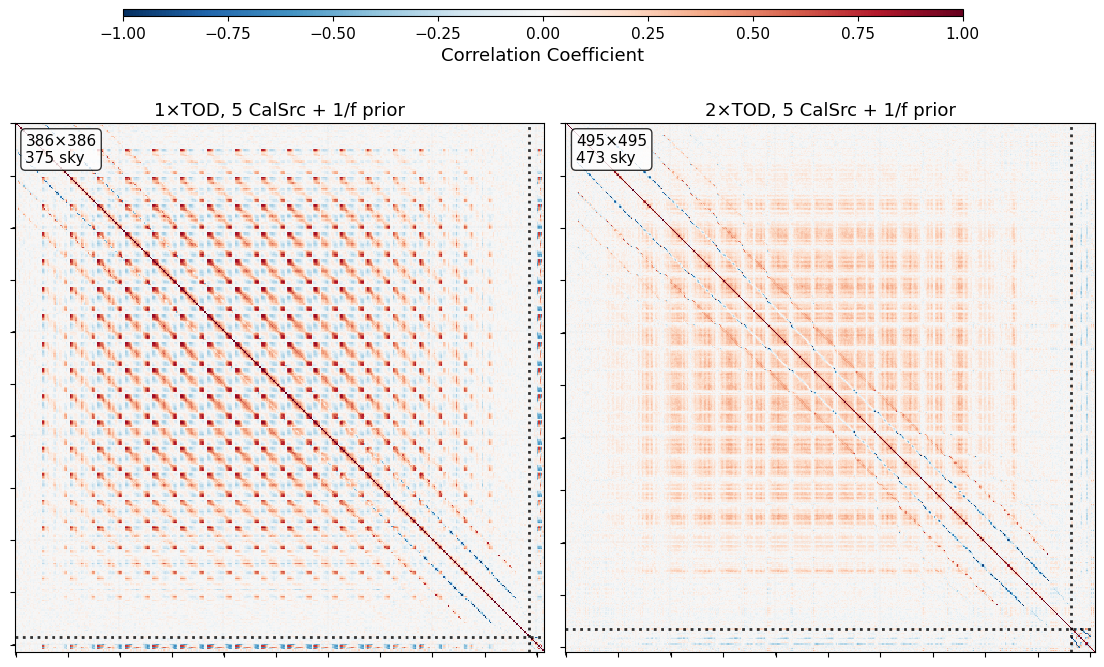

(<Figure size 1200x700 with 3 Axes>,
 array([<Axes: title={'center': '1×TOD, 5 CalSrc + 1/f prior'}>,
        <Axes: title={'center': '2×TOD, 5 CalSrc + 1/f prior'}>],
       dtype=object),
 [array([[ 1.        , -0.04250849,  0.07019644, ...,  0.05712389,
          -0.10146196,  0.03649402],
         [-0.04250849,  1.        , -0.00880167, ..., -0.02995002,
          -0.04870375,  0.02953742],
         [ 0.07019644, -0.00880167,  1.        , ...,  0.02441091,
          -0.02121307, -0.05033582],
         ...,
         [ 0.05712389, -0.02995002,  0.02441091, ...,  1.        ,
          -0.09687389,  0.01703471],
         [-0.10146196, -0.04870375, -0.02121307, ..., -0.09687389,
           1.        ,  0.02148425],
         [ 0.03649402,  0.02953742, -0.05033582, ...,  0.01703471,
           0.02148425,  1.        ]], shape=(386, 386)),
  array([[ 1.        , -0.02143414,  0.03868723, ..., -0.01859202,
           0.0469298 ,  0.01499172],
         [-0.02143414,  1.        ,  0.01824213,

In [18]:
def plot_pair_correlation_matrices(samples_list, titles_list, main_title=None, 
                                 figsize=(12, 8), cluster_params=False, ftsize=10, 
                                 show_values=False, value_threshold=0.5, sky_param_counts=None):


    
    # Default sky parameter counts if not provided
    if sky_param_counts is None:
        sky_param_counts = [375, 473]
    
    # Calculate all correlation matrices first to get global vmin/vmax
    corr_matrices = []
    all_corr_values = []
    
    for samples in samples_list:
        samples = np.array(samples)
        n_samples, n_params = samples.shape
        
        # Calculate correlation matrix
        corr_matrix = np.corrcoef(samples.T)
        
        # Optional clustering
        if cluster_params and n_params > 10:
            try:
                from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
                from scipy.spatial.distance import squareform
                
                # Use correlation distance for clustering
                distance_matrix = 1 - np.abs(corr_matrix)
                condensed_distances = squareform(distance_matrix, checks=False)
                linkage_matrix = linkage(condensed_distances, method='average')
                cluster_order = leaves_list(linkage_matrix)
                
                # Reorder correlation matrix
                corr_matrix = corr_matrix[cluster_order][:, cluster_order]
            except ImportError:
                print("scipy not available for clustering, using original order")
        
        corr_matrices.append(corr_matrix)
        
        # Collect all correlation values for global color scale
        upper_tri = np.triu(corr_matrix, k=1)
        all_corr_values.extend(upper_tri[upper_tri != 0])
    
    # Create figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    if main_title is not None:
        fig.suptitle(main_title, fontsize=ftsize+4, y=0.98)
    
    # Flatten axes for easier indexing
    axes_flat = axes.flatten()
    
    # Plot each correlation matrix
    images = []
    for idx, (corr_matrix, title, ax) in enumerate(zip(corr_matrices, titles_list, axes_flat)):
        n_params = corr_matrix.shape[0]
        n_sky_params = sky_param_counts[idx]
        
        # Plot heatmap
        im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal', 
                      interpolation='nearest')
        images.append(im)
        
        # Add dashed lines to separate sky parameters from others
        if n_sky_params < n_params:
            # Vertical line separating sky (left) from others (right)
            ax.axvline(x=n_sky_params-0.5, color='black', linestyle=':', linewidth=2, alpha=0.8)
            # Horizontal line separating sky (top) from others (bottom)  
            ax.axhline(y=n_sky_params-0.5, color='black', linestyle=':', linewidth=2, alpha=0.8)
        
        # Set ticks - reduce number for large matrices
        if n_params <= 20:
            tick_spacing = 1
            show_all_labels = True
        elif n_params <= 50:
            tick_spacing = 2
            show_all_labels = False
        else:
            tick_spacing = max(1, n_params // 10)
            show_all_labels = False
        
        tick_positions = range(0, n_params, tick_spacing)
        ax.set_xticks(tick_positions)
        ax.set_yticks(tick_positions)
        
        # For subplots, use minimal labeling to avoid clutter
        if n_params <= 30 and show_all_labels:
            # Show some labels for smaller matrices
            ax.set_xticklabels([f'P{i+1}' if i % (tick_spacing*2) == 0 else '' 
                               for i in tick_positions], rotation=45, ha='right', fontsize=ftsize-2)
            ax.set_yticklabels([f'P{i+1}' if i % (tick_spacing*2) == 0 else '' 
                               for i in tick_positions], fontsize=ftsize-2)
        else:
            # For large matrices, minimal tick labels
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            
            # Add parameter count and sky parameter info as text
            info_text = f'{n_params}×{n_params}\n{n_sky_params} sky'
            ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
                   fontsize=ftsize-1, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add correlation values for very small matrices only
        if show_values and n_params <= 10:
            for i in range(n_params):
                for j in range(n_params):
                    if abs(corr_matrix[i, j]) > value_threshold or i == j:
                        color = "white" if abs(corr_matrix[i, j]) > 0.7 else "black"
                        ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                               ha="center", va="center", color=color, 
                               fontsize=max(6, ftsize-3))
        
        # Add grid for better readability in large matrices
        if n_params > 15:
            ax.set_xticks(np.arange(-0.5, n_params, tick_spacing*2), minor=True)
            ax.set_yticks(np.arange(-0.5, n_params, tick_spacing*2), minor=True)
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.1, alpha=0.3)
        
        # Set subplot title
        ax.set_title(title, fontsize=ftsize+1, pad=5)
        
        # Print summary statistics for each matrix
        upper_tri = np.triu(corr_matrix, k=1)
        non_zero_corr = upper_tri[upper_tri != 0]
        strong_corr = np.sum(np.abs(non_zero_corr) > 0.5)
        moderate_corr = np.sum((np.abs(non_zero_corr) > 0.3) & (np.abs(non_zero_corr) <= 0.5))
        
        print(f"{title}:")
        print(f"  Matrix size: {n_params}×{n_params} ({n_sky_params} sky, {n_params-n_sky_params} others)")
        print(f"  Strong correlations (|r| > 0.5): {strong_corr}")
        print(f"  Moderate correlations (0.3 < |r| ≤ 0.5): {moderate_corr}")
        print(f"  Max absolute correlation: {np.max(np.abs(non_zero_corr)):.3f}")
        print()
    
    # Add a single colorbar for all subplots
    # Create colorbar axis at the top
    cbar_ax = fig.add_axes([0.13, 0.96, 0.7, 0.01])  # [left, bottom, width, height]
    cbar = fig.colorbar(images[0], cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Correlation Coefficient', fontsize=ftsize+1)
    cbar.ax.tick_params(labelsize=ftsize-1)
    
    # Adjust subplot layout
    plt.subplots_adjust(left=0.04, right=0.94, top=0.96, bottom=-0.1, 
                       wspace=0.04, hspace=0.0)
    
    # plt.tight_layout()
    plt.savefig('figures/two_correlation_matrices.pdf', dpi=300)
    
    return fig, axes, corr_matrices

# Function to create the 6-panel plot with your specific datasets
def plot_two_correlation_matrices():
    
    # Check which datasets are available
    datasets = []
    titles = []
    dataset_names = ['GSF5_all', 'GSF5_db_all']
    
    aux_titles = [
        "1×TOD, 5 CalSrc + 1/f prior",
        "2×TOD, 5 CalSrc + 1/f prior"
    ]
    
    for i, dataset_name in enumerate(dataset_names):
        if dataset_name in globals():
            datasets.append(globals()[dataset_name])
            titles.append(aux_titles[i])
        else:
            print(f"Warning: {dataset_name} not found in globals()")
    
    if len(datasets) == 2:
        # Sky parameter counts: first 3 panels have 375 sky params, last 3 have 473
        sky_counts = [375, 473] 
        
        fig, axes, corr_matrices = plot_pair_correlation_matrices(
            datasets, 
            titles,
            figsize=(12, 7),
            cluster_params=False,
            ftsize=12,
            show_values=False,
            sky_param_counts=sky_counts
        )
        plt.show()
        return fig, axes, corr_matrices
    else:
        print(f"Found {len(datasets)} datasets, need exactly 2")
        return None, None, None

# Execute the plotting function
plot_two_correlation_matrices()